In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


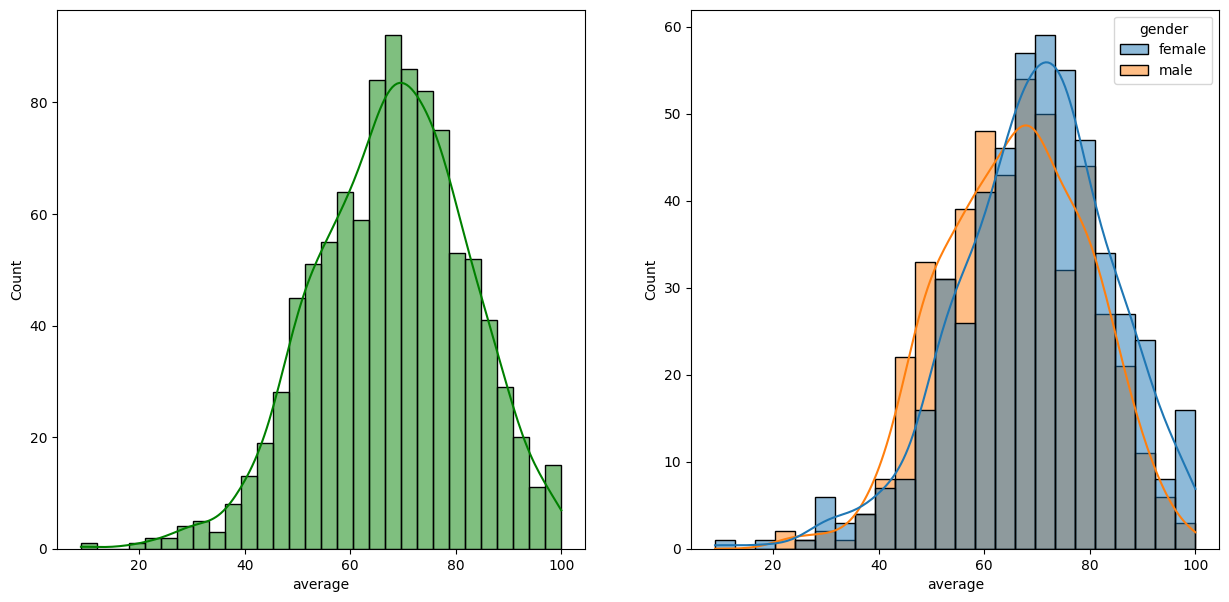

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

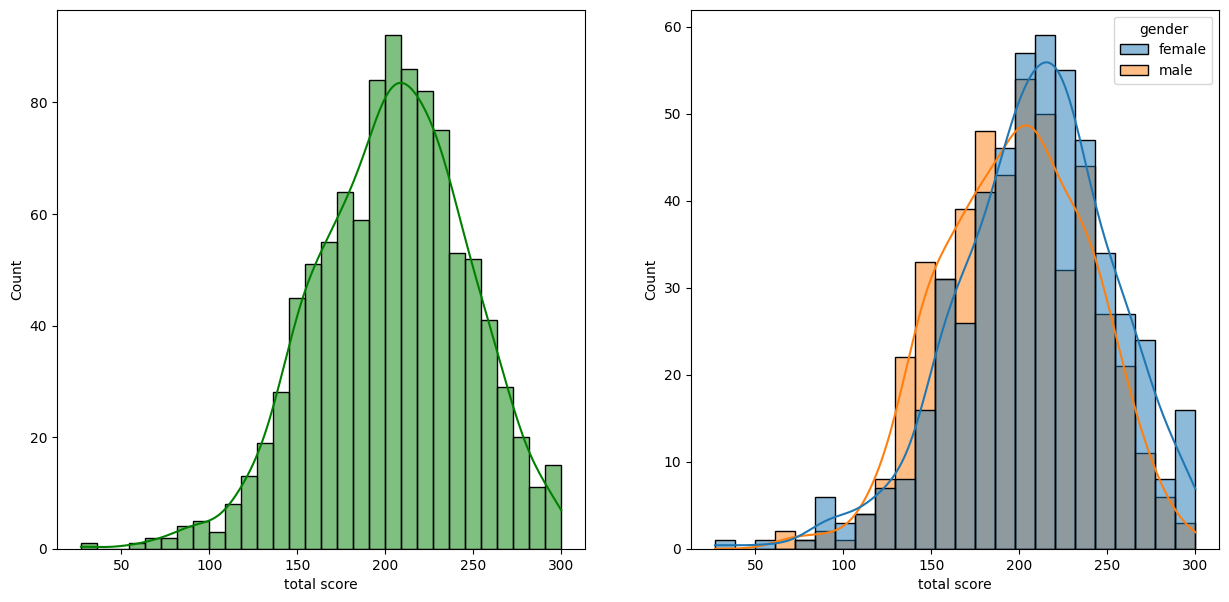

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

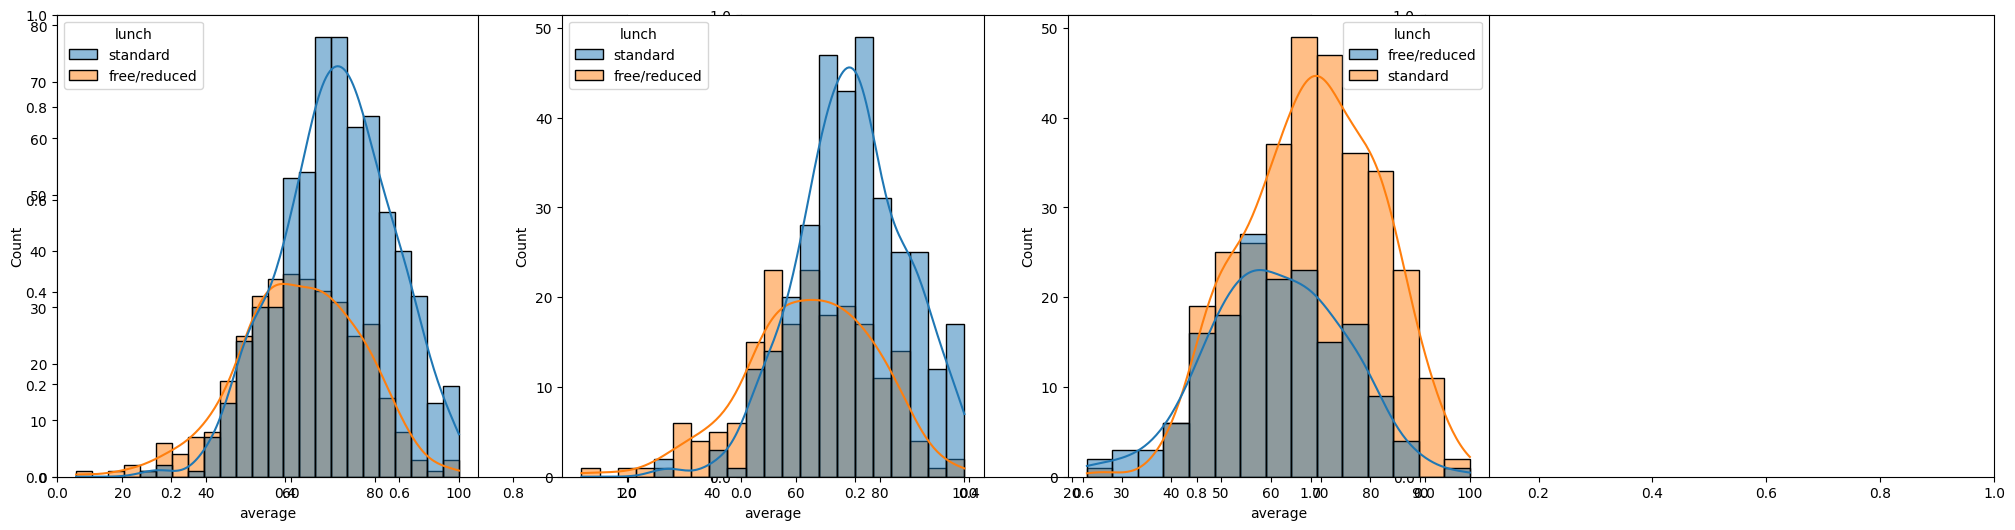

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [24]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


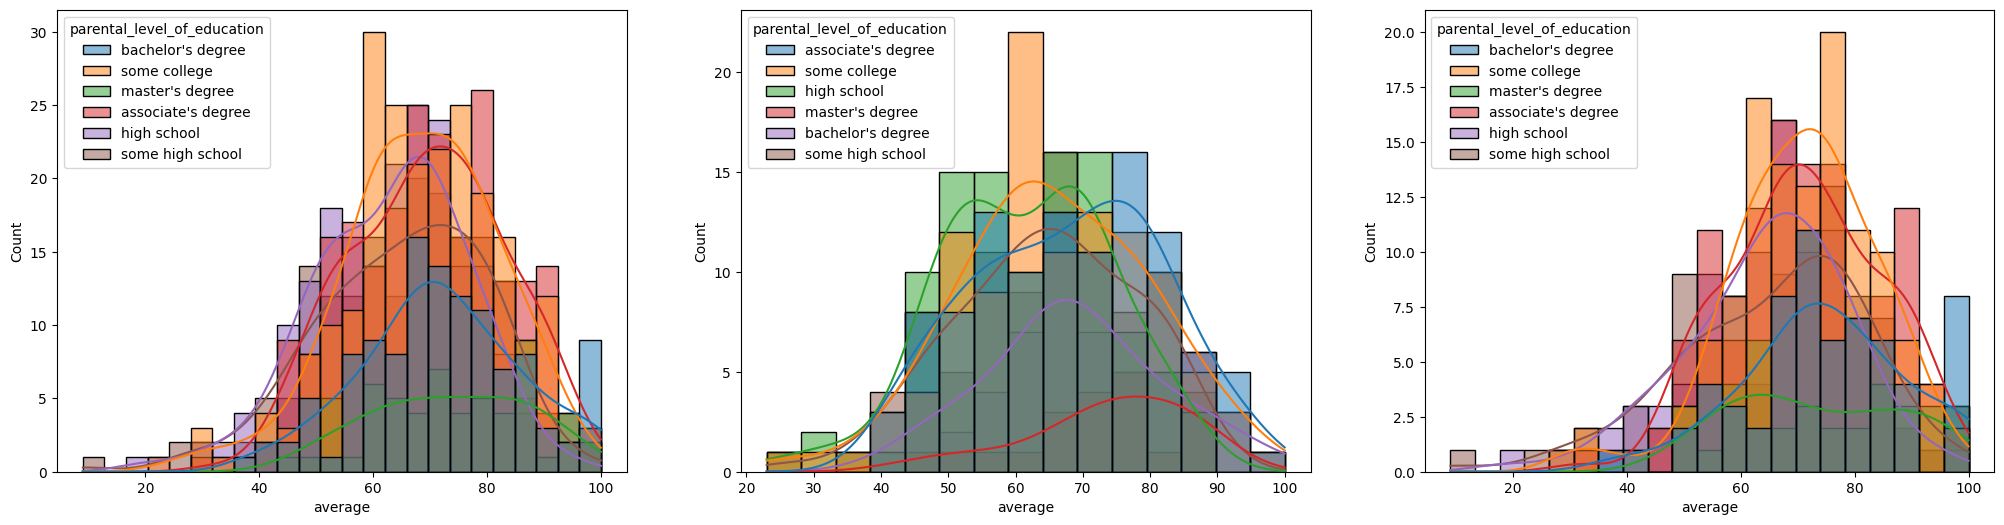

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plot the histograms on each subplot
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])

# Show the plot
plt.show()


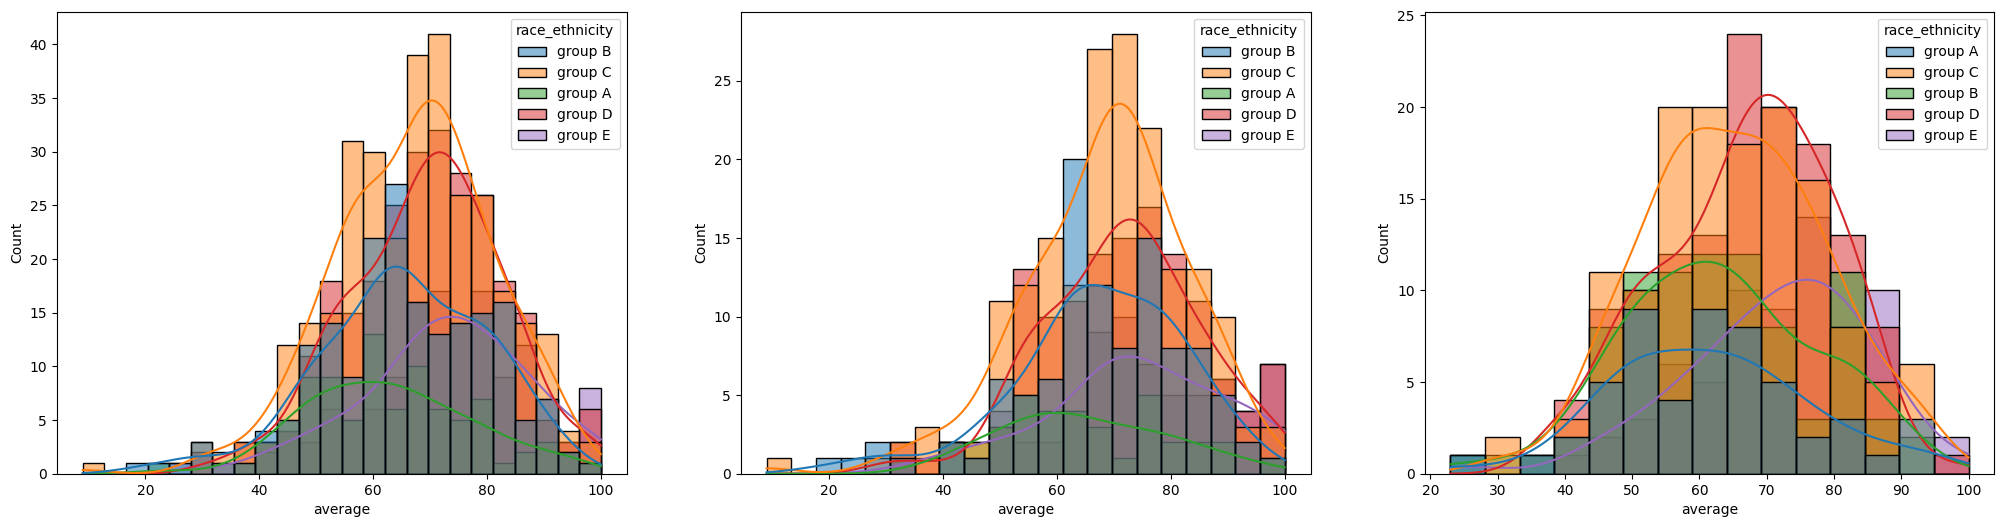

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race_ethnicity')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race_ethnicity')

plt.show()


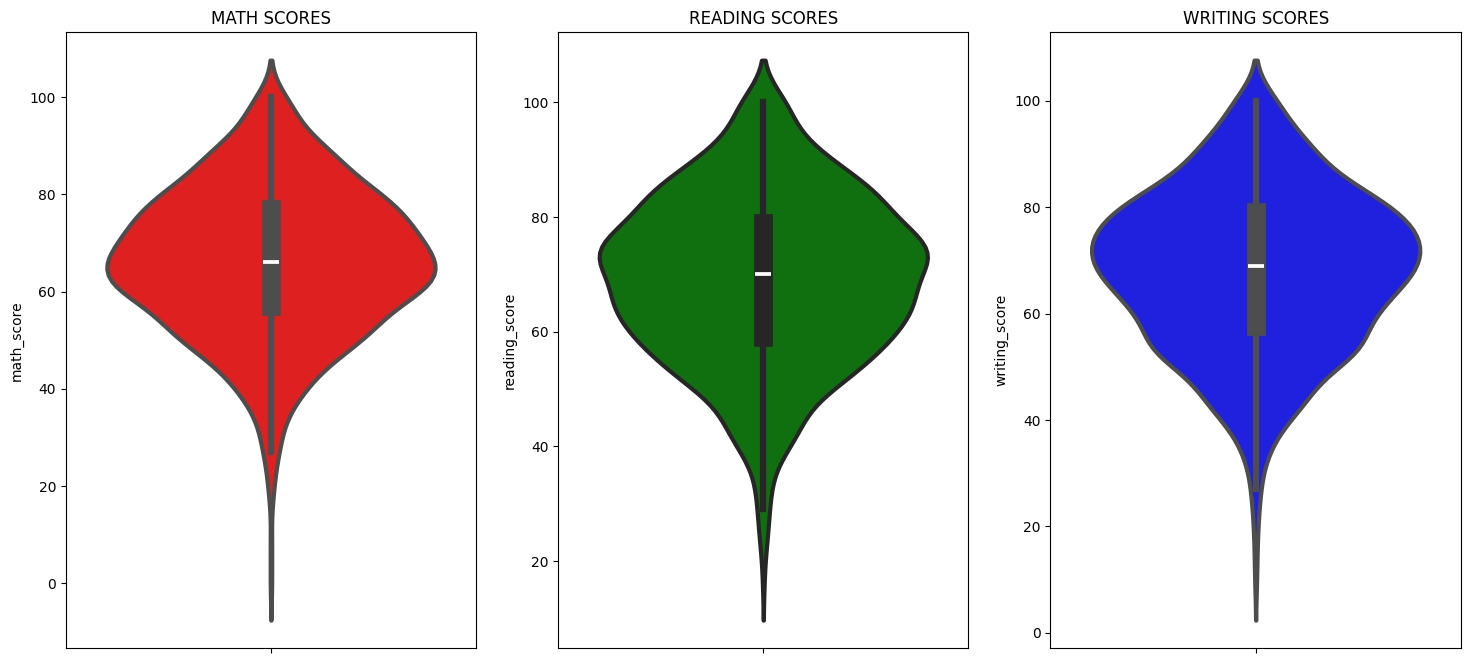

In [29]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.show()


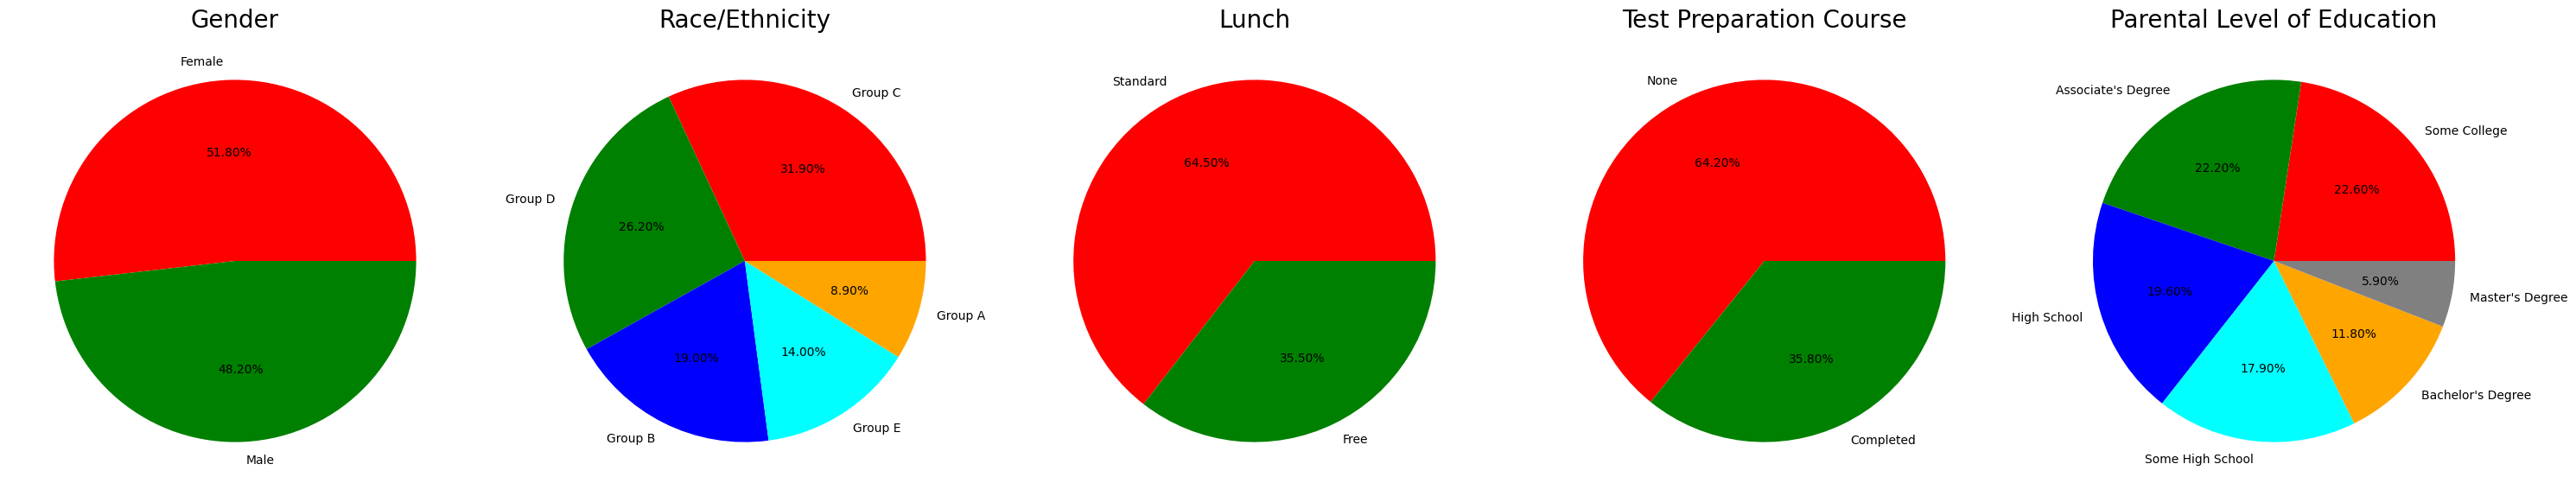

In [31]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ["Some College", "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


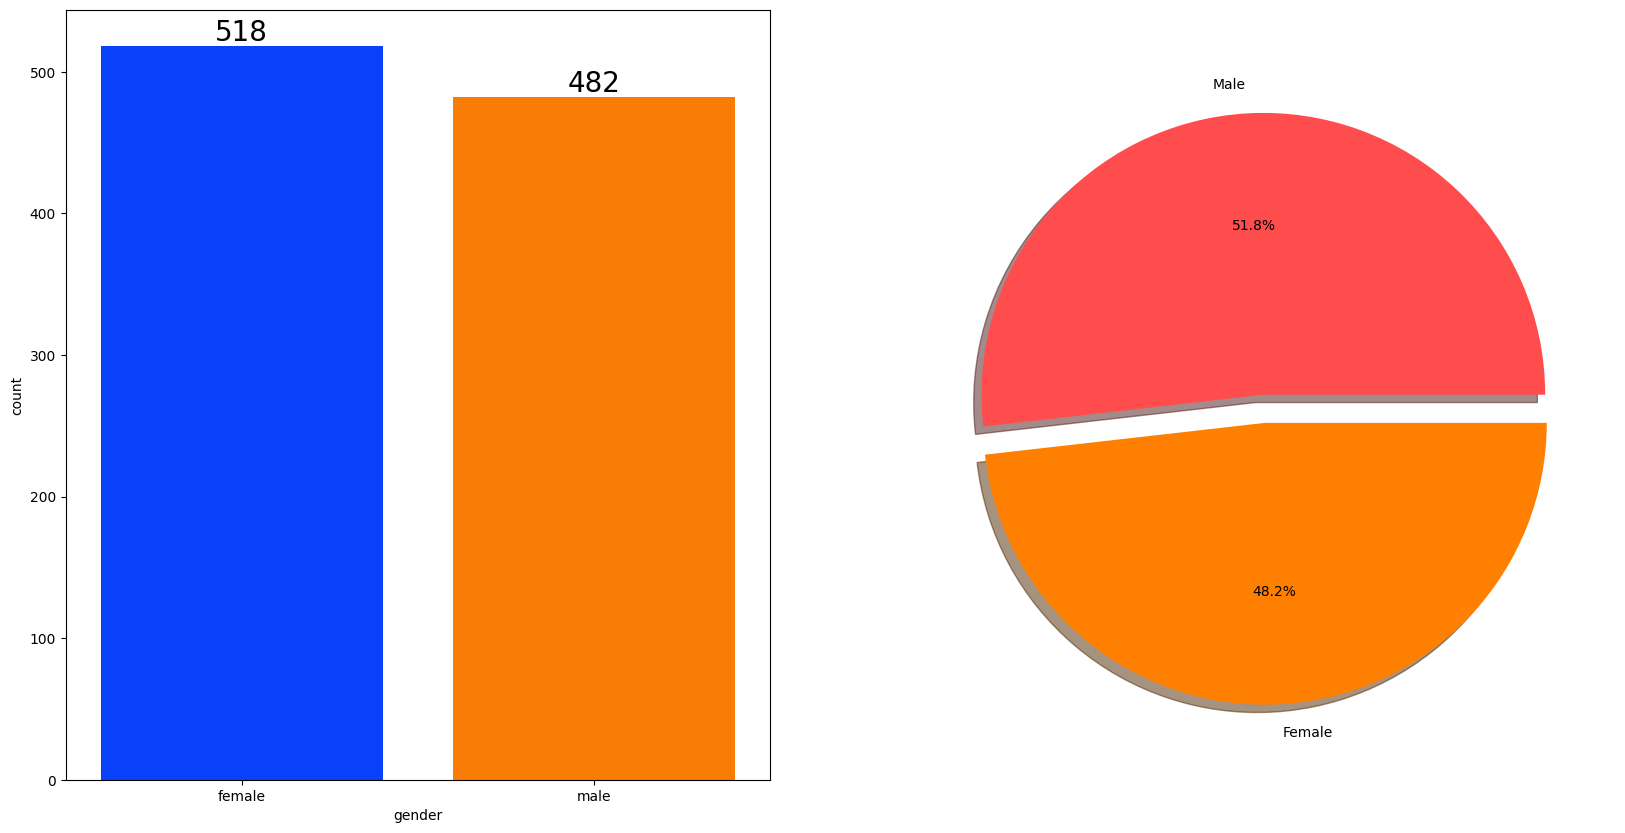

In [32]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart
ax[1].pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])

plt.show()


In [37]:
print(df.columns)



Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


In [38]:
# Strip leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()


In [40]:
# Check unique values in the 'gender' column
print(df['gender'].unique())

# Check data types of all columns
print(df.dtypes)



['female' 'male']
gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total score                      int64
average                        float64
dtype: object


In [44]:
# Select numeric columns
numeric_columns = df[['math_score', 'reading_score', 'writing_score']]

# Group by 'gender' and compute the mean for numeric columns
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

# Display the result
print(gender_group)



        math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


In [46]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number')

# Check if 'gender' column exists in the DataFrame
if 'gender' in df.columns:
    # Group by 'gender' and compute the mean for numeric columns
    gender_group = numeric_columns.groupby(df['gender']).mean()
    # Display the result
    print(gender_group)
else:
    print("The 'gender' column does not exist in the DataFrame.")



        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


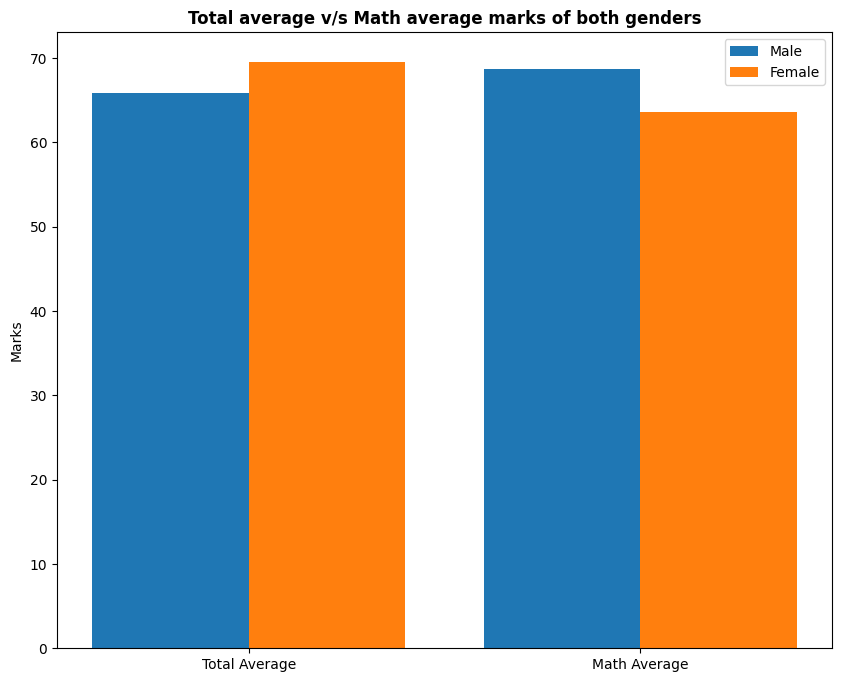

In [47]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()


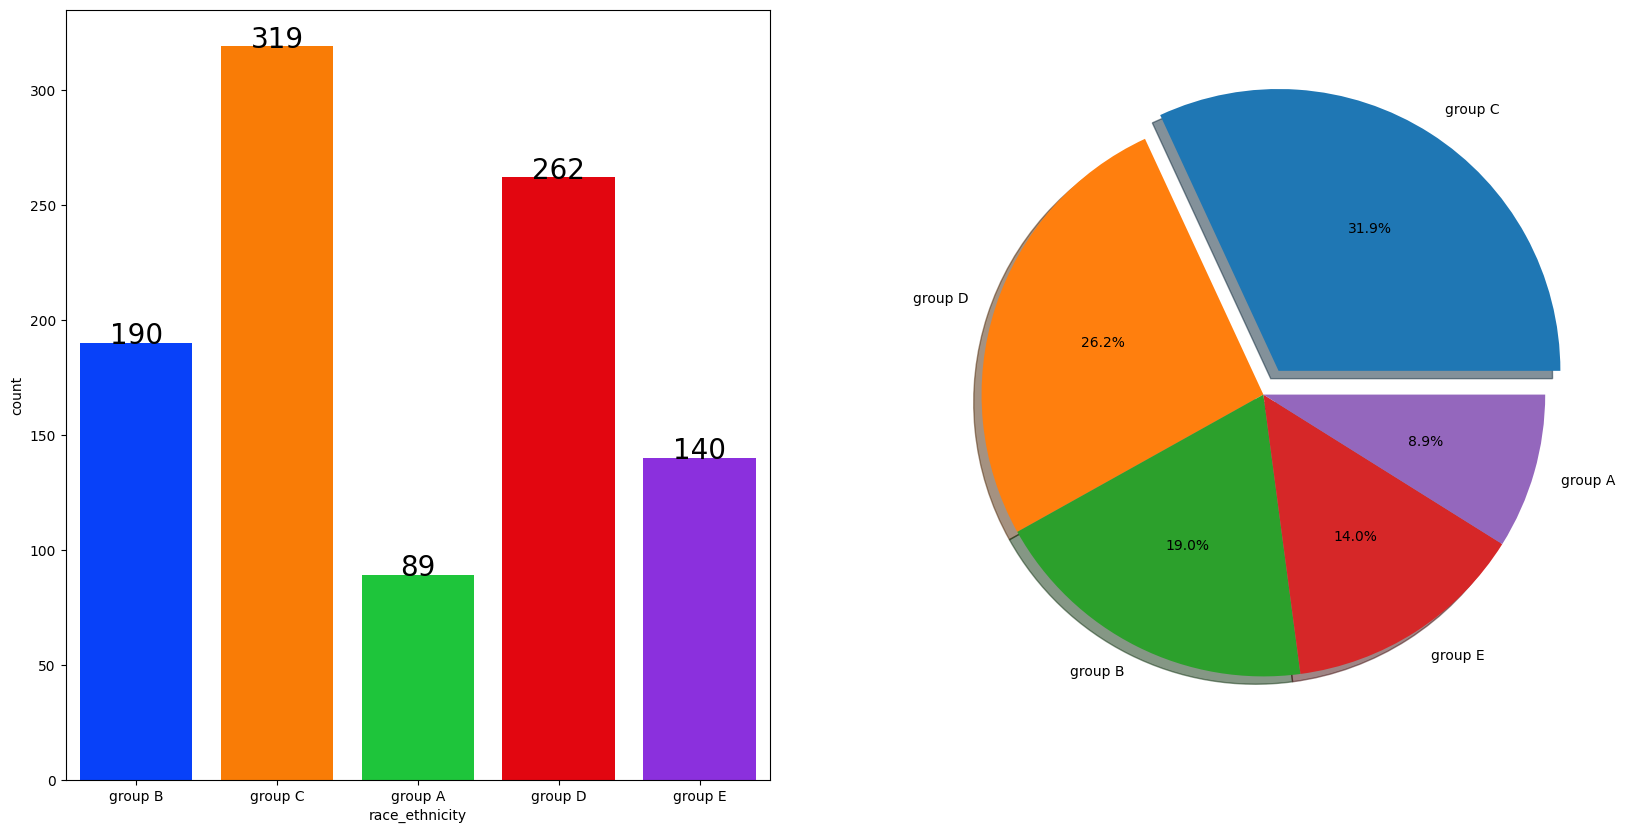

In [48]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].patches:
    ax[0].annotate(format(container.get_height(), '.0f'),
                   (container.get_x() + container.get_width() / 2,
                    container.get_height()), ha='center', va='center',
                   size=20, xytext=(0, 5), textcoords='offset points')

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.show()


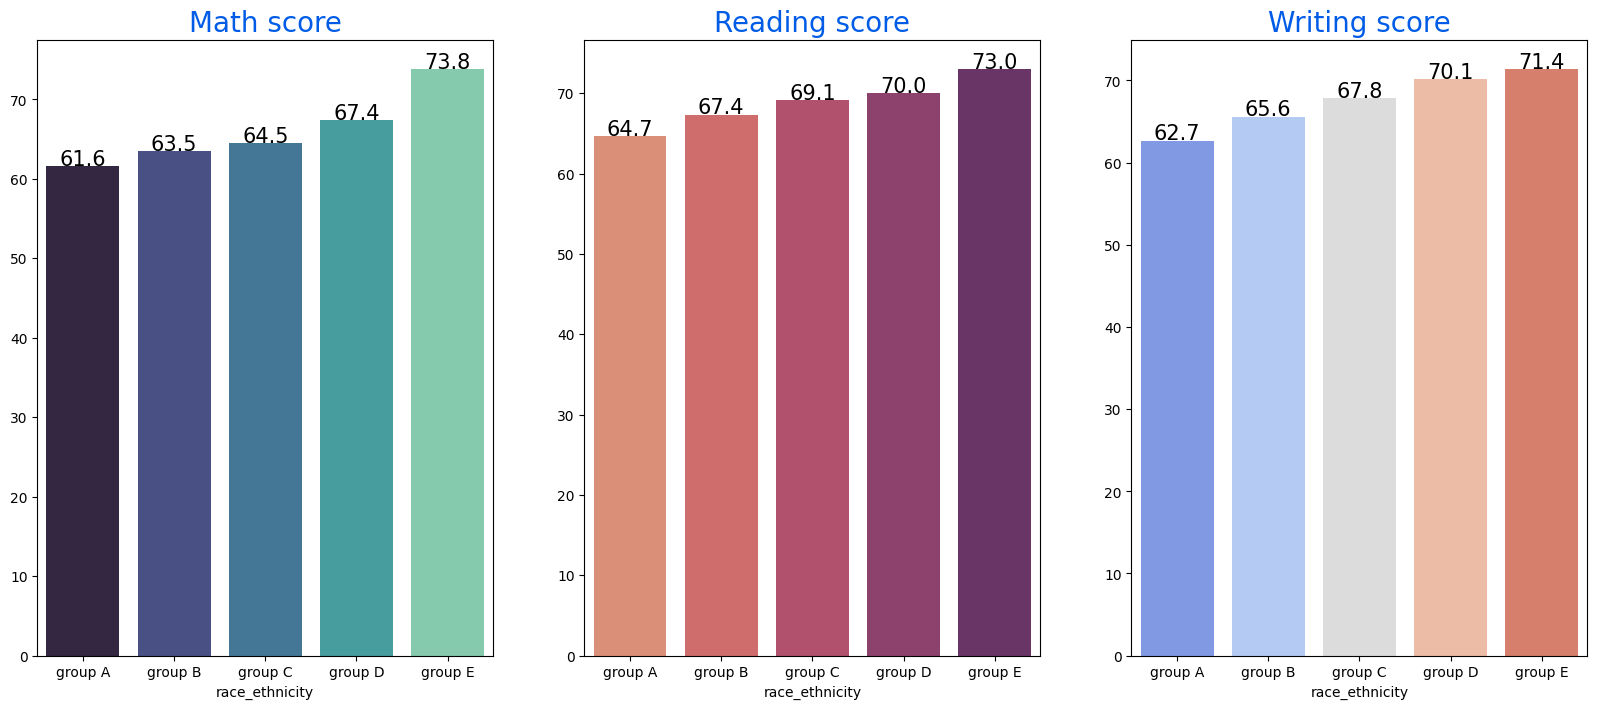

In [49]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].patches:
    ax[0].annotate(format(container.get_height(), '.1f'),
                   (container.get_x() + container.get_width() / 2, container.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 5), textcoords='offset points')

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].patches:
    ax[1].annotate(format(container.get_height(), '.1f'),
                   (container.get_x() + container.get_width() / 2, container.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 5), textcoords='offset points')

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].patches:
    ax[2].annotate(format(container.get_height(), '.1f'),
                   (container.get_x() + container.get_width() / 2, container.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 5), textcoords='offset points')

plt.show()


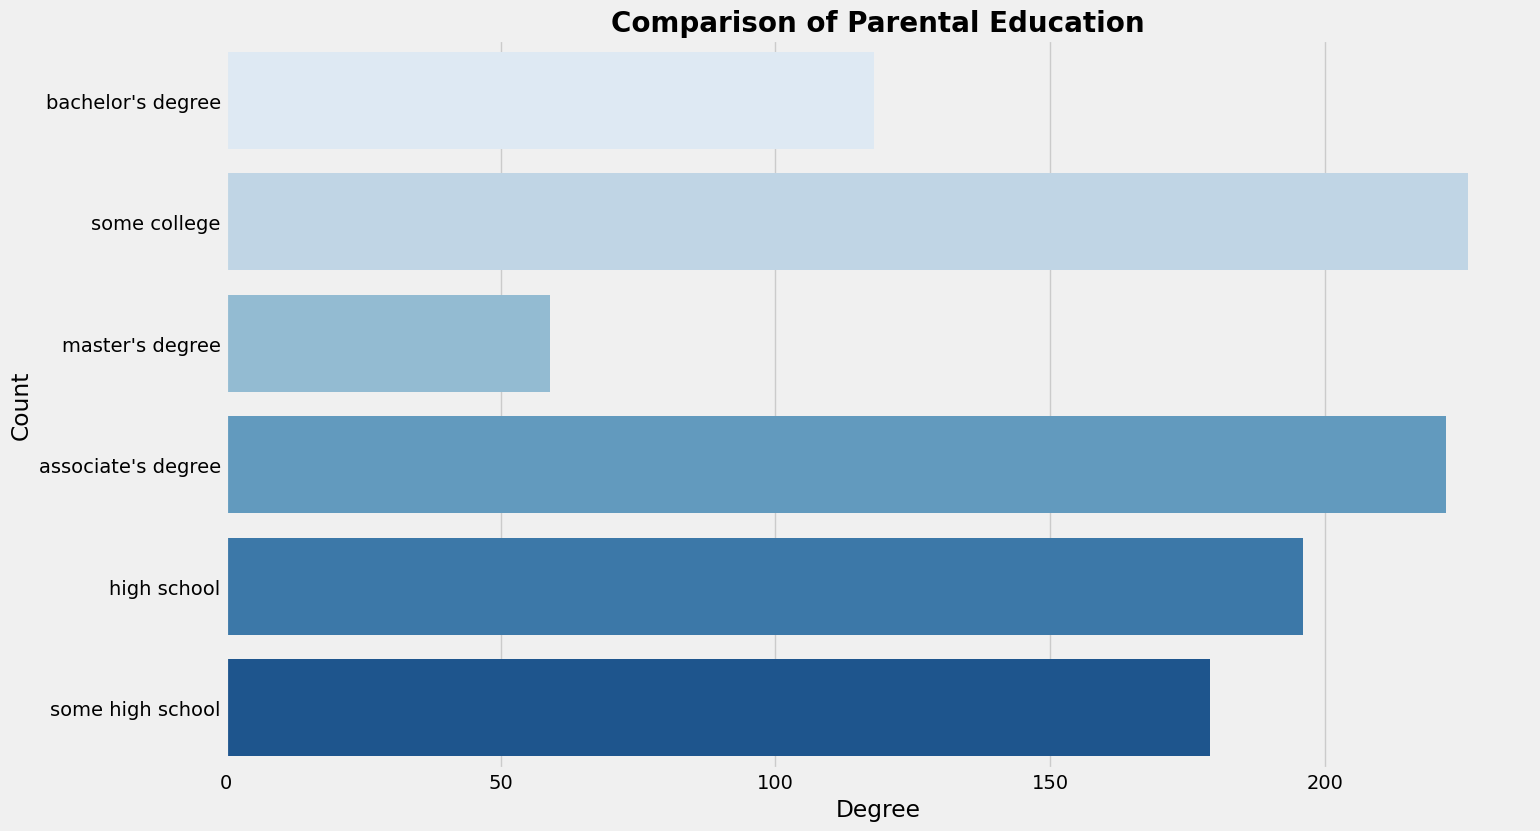

In [50]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


In [52]:
df.dtypes


gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total score                      int64
average                        float64
dtype: object

In [53]:
missing_values = df['parental_level_of_education'].isnull().sum()
print("Number of missing values in 'parental_level_of_education' column:", missing_values)


Number of missing values in 'parental_level_of_education' column: 0


In [54]:
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')


In [55]:
print(df.dtypes)


gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total score                      int64
average                        float64
dtype: object


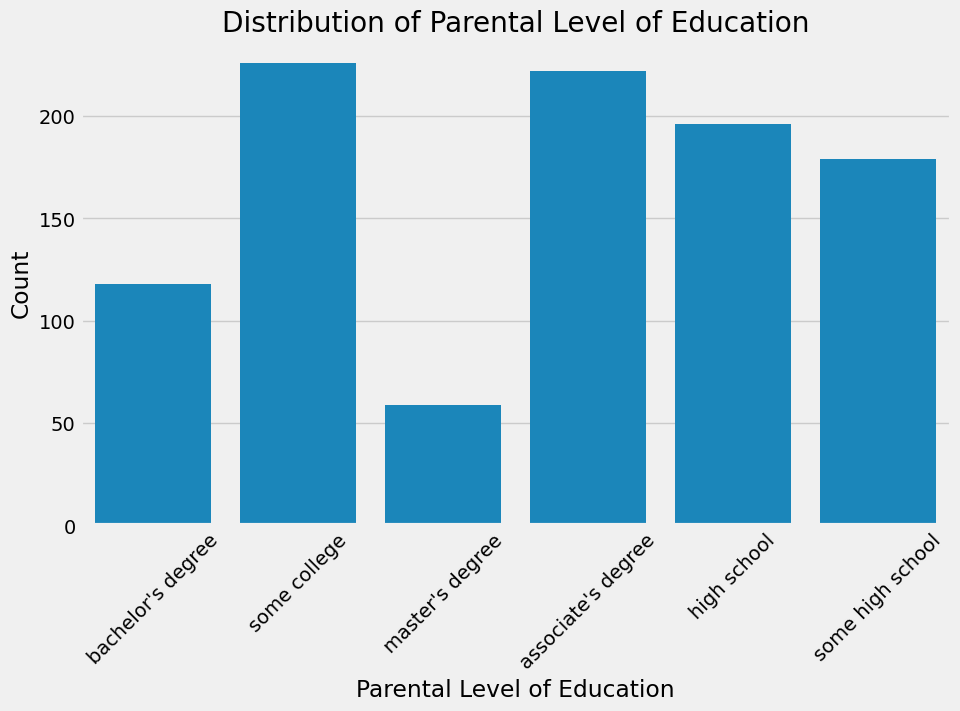

In [59]:

# Plot a count plot of 'parental_level_of_education'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental_level_of_education')
plt.title('Distribution of Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



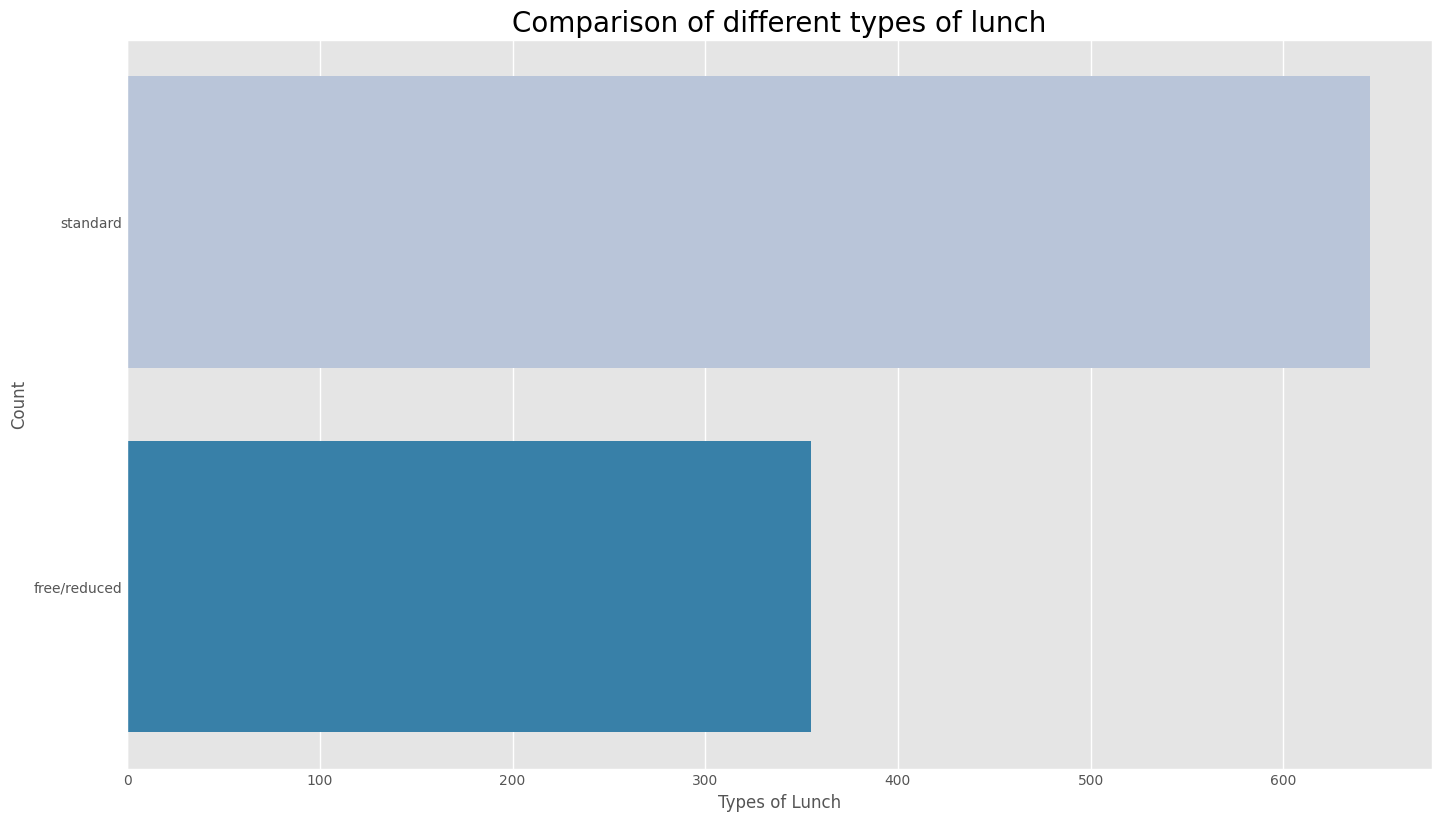

In [62]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')  # Using the 'ggplot' style as an alternative
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()



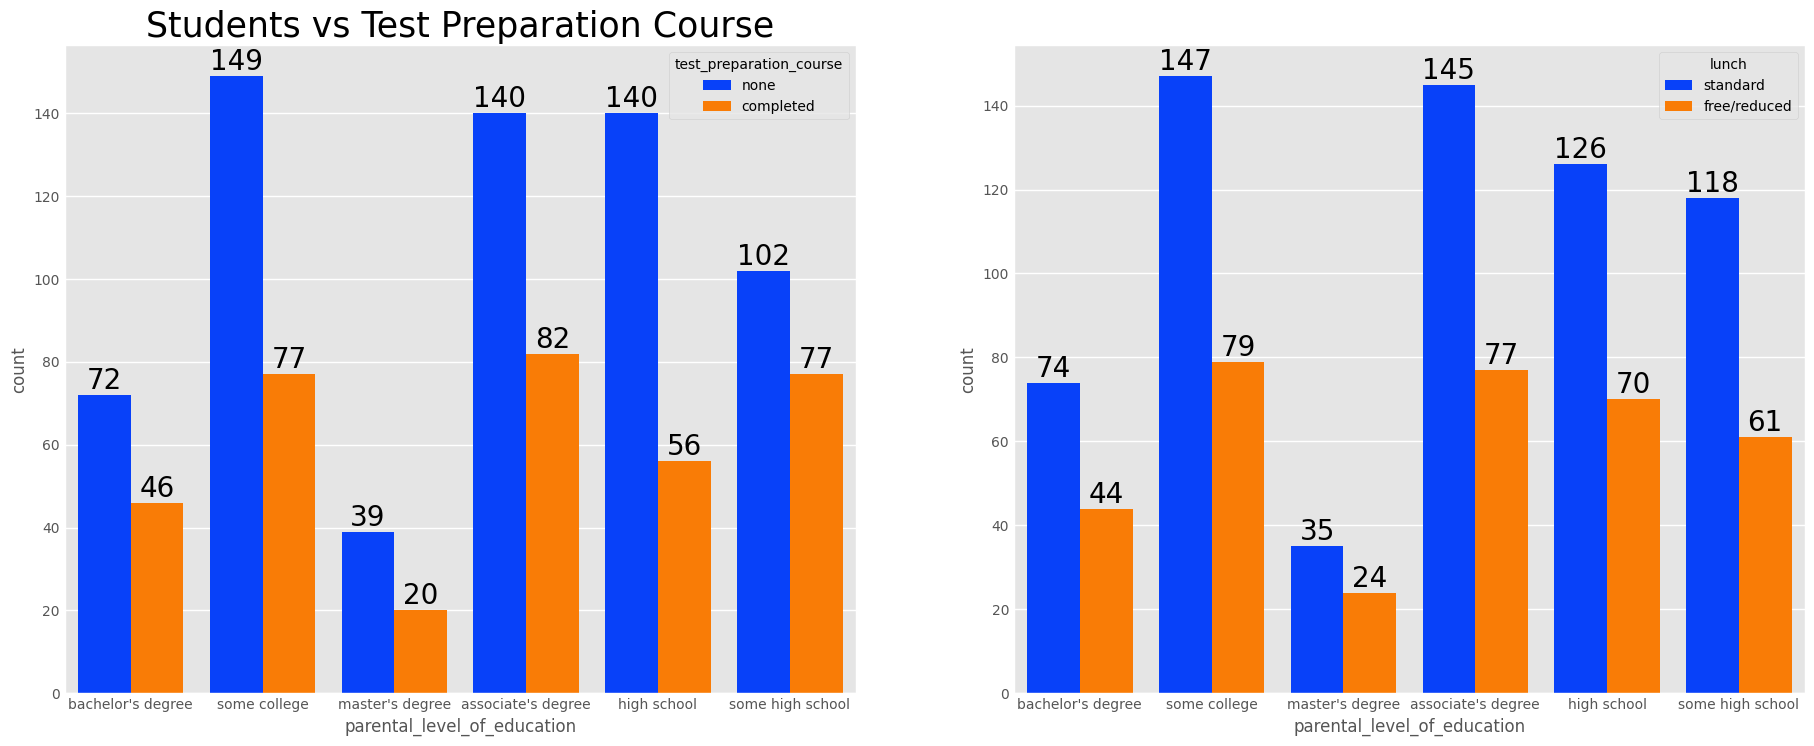

In [63]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()


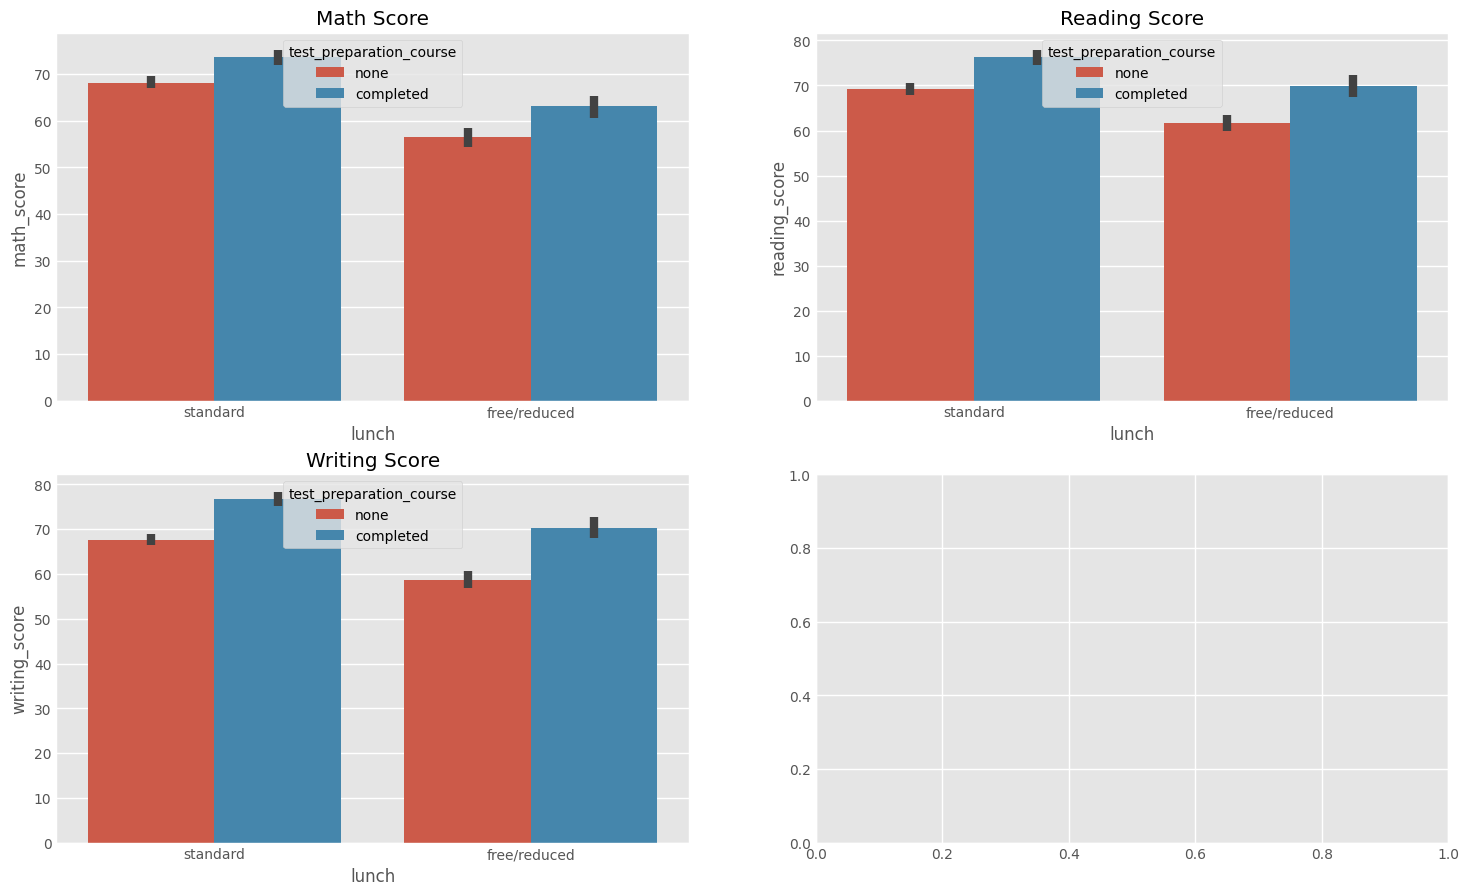

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot for Math Score
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Math Score')

# Plot for Reading Score
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Reading Score')

# Plot for Writing Score
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Writing Score')

plt.show()


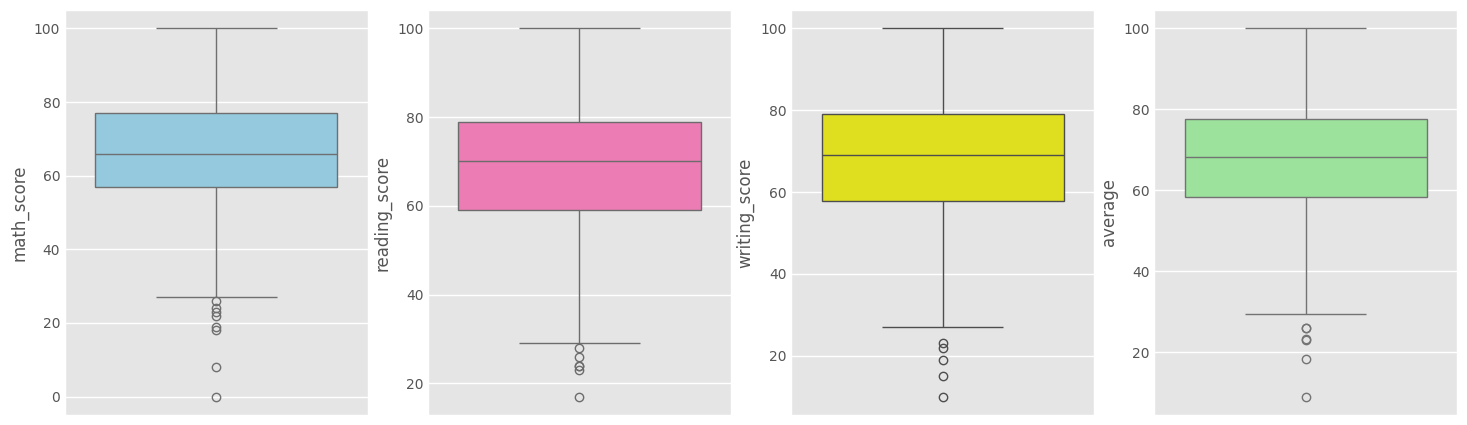

In [67]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
sns.boxplot(df['math_score'], color='skyblue', ax=axes[0])
sns.boxplot(df['reading_score'], color='hotpink', ax=axes[1])
sns.boxplot(df['writing_score'], color='yellow', ax=axes[2])
sns.boxplot(df['average'], color='lightgreen', ax=axes[3])
plt.show()


gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total score                      int64
average                        float64
dtype: object


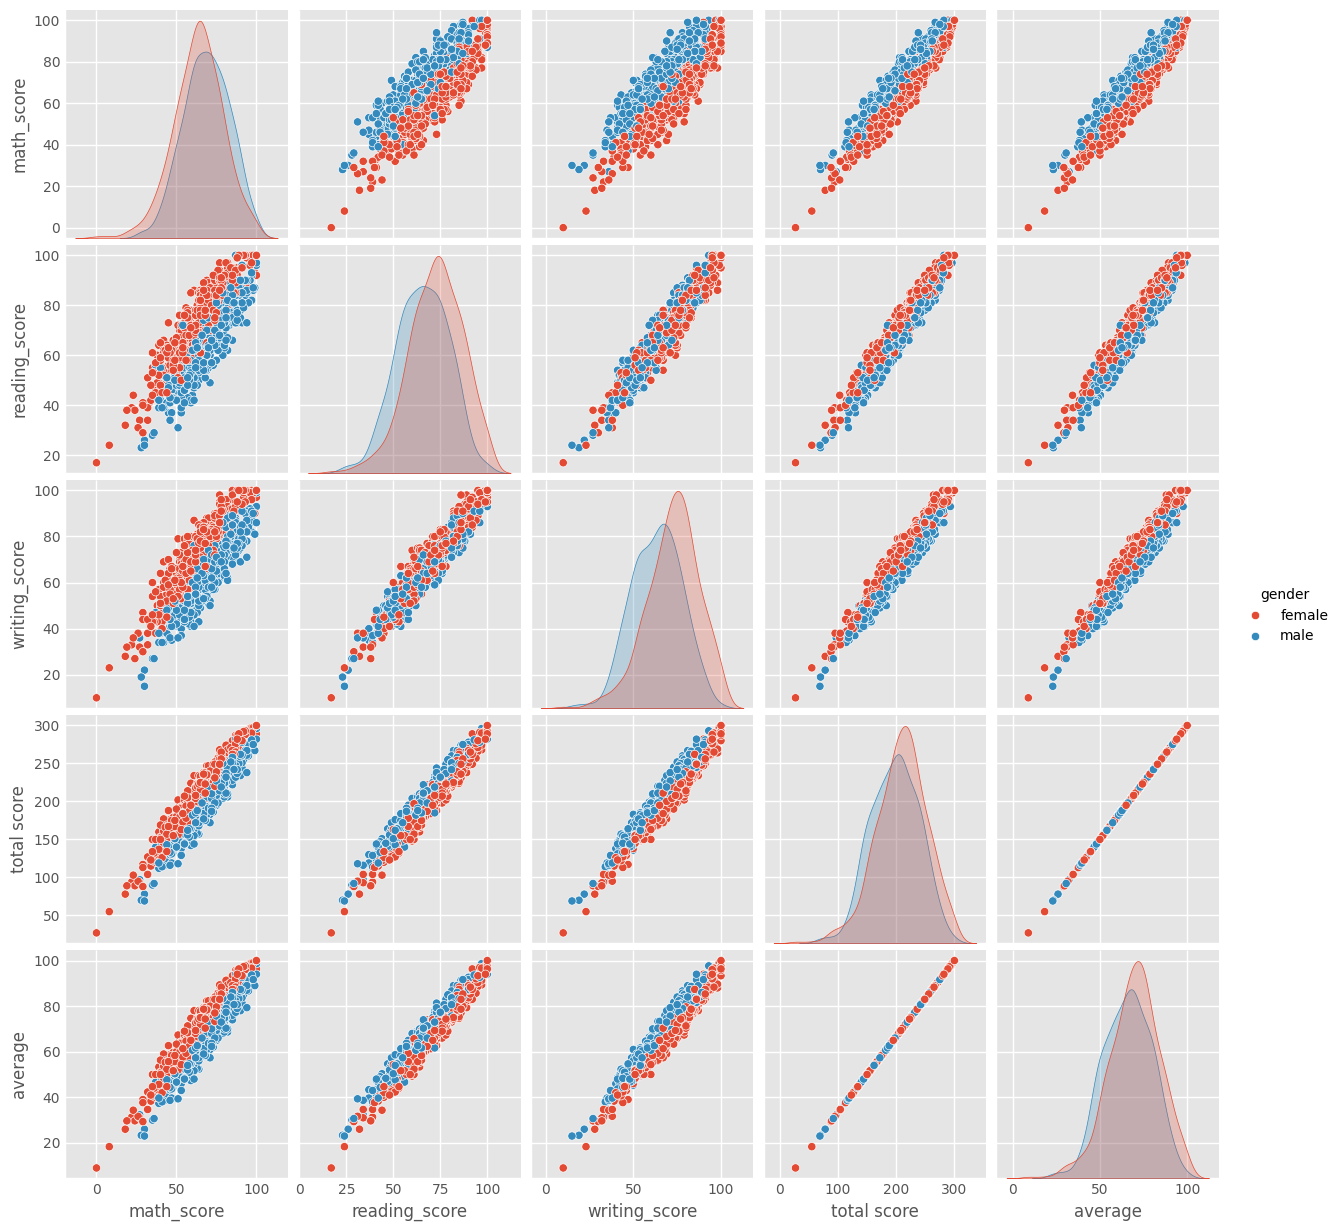

In [68]:
# Check the data types of each column
print(df.dtypes)

# If 'gender' is not of object data type, convert it to object
df['gender'] = df['gender'].astype(str)

# Now try plotting again
sns.pairplot(df, hue='gender')
plt.show()
